<a href="https://colab.research.google.com/github/1o-o1/Choke-size-prediction/blob/main/choke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/
%ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
 Accuracy.ipynb
 Accuracy.png
 catdog/
 Catdog1F1.png
 Catdog1loss.png
 catdogmodel.h5
 catdogt1.ipynb
'Copy of catdogt1.ipynb'
'Copy of image_classification_part1.ipynb'
'Copy of Machine Learning Engineer | Sabbir.ipynb'
 F1Score.ipynb
 F1Score.png
'Final Results - f1.csv'
'Final Results - Sheet2.csv'
 heart.ipynb
 horse/
 image.png
 img2.PNG
 img3.PNG
'Machine Learning Engineer | Sabbir.ipynb'
 ocr2.ipynb
 ocr.ipynb
 Resultgen2.csv
 Resultgen3.csv
 Resultgen.csv
 Resultgen.gsheet
 Untitled0.ipynb
 volvo/


In [ ]:
df=pd.read_csv('volvo/dataset.csv')

In [ ]:
df.head()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
0,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0,0,0,NaN
1,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0,0,0,NaN
2,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0,0,0,NaN
3,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0,0,0,NaN
4,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0,0,0,NaN


In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
dtype: int64

In [ ]:
df2 = df[df['AVG_CHOKE_SIZE_P'].notna()]

In [ ]:
print(df2.shape)
missing_values_count = df2.isnull().sum()
missing_values_count

(8919, 13)


ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE        179
AVG_DOWNHOLE_TEMPERATURE     179
AVG_DP_TUBING                179
AVG_ANNULUS_PRESS           1246
AVG_CHOKE_SIZE_P               0
AVG_WHP_P                      4
AVG_WHT_P                     13
DP_CHOKE_SIZE                  4
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 8904
dtype: int64

In [ ]:
df2=df2.drop(columns=['BORE_WI_VOL'])

In [ ]:
df2.dtypes

ON_STREAM_HRS               float64
AVG_DOWNHOLE_PRESSURE       float64
AVG_DOWNHOLE_TEMPERATURE    float64
AVG_DP_TUBING               float64
AVG_ANNULUS_PRESS           float64
AVG_CHOKE_SIZE_P            float64
AVG_WHP_P                   float64
AVG_WHT_P                   float64
DP_CHOKE_SIZE               float64
BORE_OIL_VOL                 object
BORE_GAS_VOL                 object
BORE_WAT_VOL                 object
dtype: object

In [ ]:
df2['BORE_GAS_VOL'][18]

'178,064'

In [ ]:
df2['BORE_OIL_VOL'] = df2['BORE_OIL_VOL'].str.replace(',', '').astype(float)
df2['BORE_GAS_VOL'] = df2['BORE_GAS_VOL'].str.replace(',', '').astype(float)
df2['BORE_WAT_VOL'] = df2['BORE_WAT_VOL'].str.replace(',', '').astype(float)

In [ ]:
df2.dtypes

ON_STREAM_HRS               float64
AVG_DOWNHOLE_PRESSURE       float64
AVG_DOWNHOLE_TEMPERATURE    float64
AVG_DP_TUBING               float64
AVG_ANNULUS_PRESS           float64
AVG_CHOKE_SIZE_P            float64
AVG_WHP_P                   float64
AVG_WHT_P                   float64
DP_CHOKE_SIZE               float64
BORE_OIL_VOL                float64
BORE_GAS_VOL                float64
BORE_WAT_VOL                float64
dtype: object

In [ ]:
df2=df2.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
print(df2.shape)
missing_values_count = df2.isnull().sum()
missing_values_count

(8919, 12)


ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

In [ ]:
x=df2.drop('AVG_CHOKE_SIZE_P', axis=1)
y=df2['AVG_CHOKE_SIZE_P']
print(x.shape)
y.shape

(8919, 11)


(8919,)

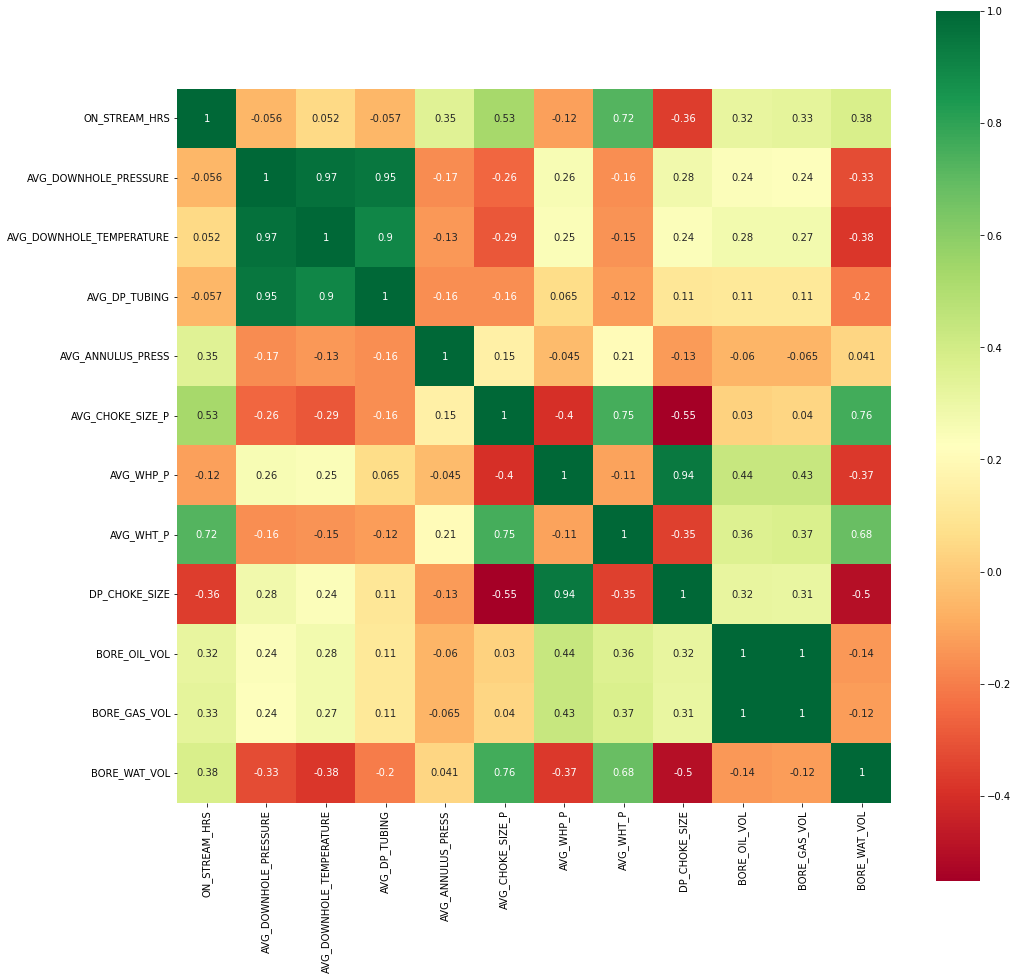

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df2.corr(), annot=True,cmap='RdYlGn',square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'DP_CHOKE_SIZE')

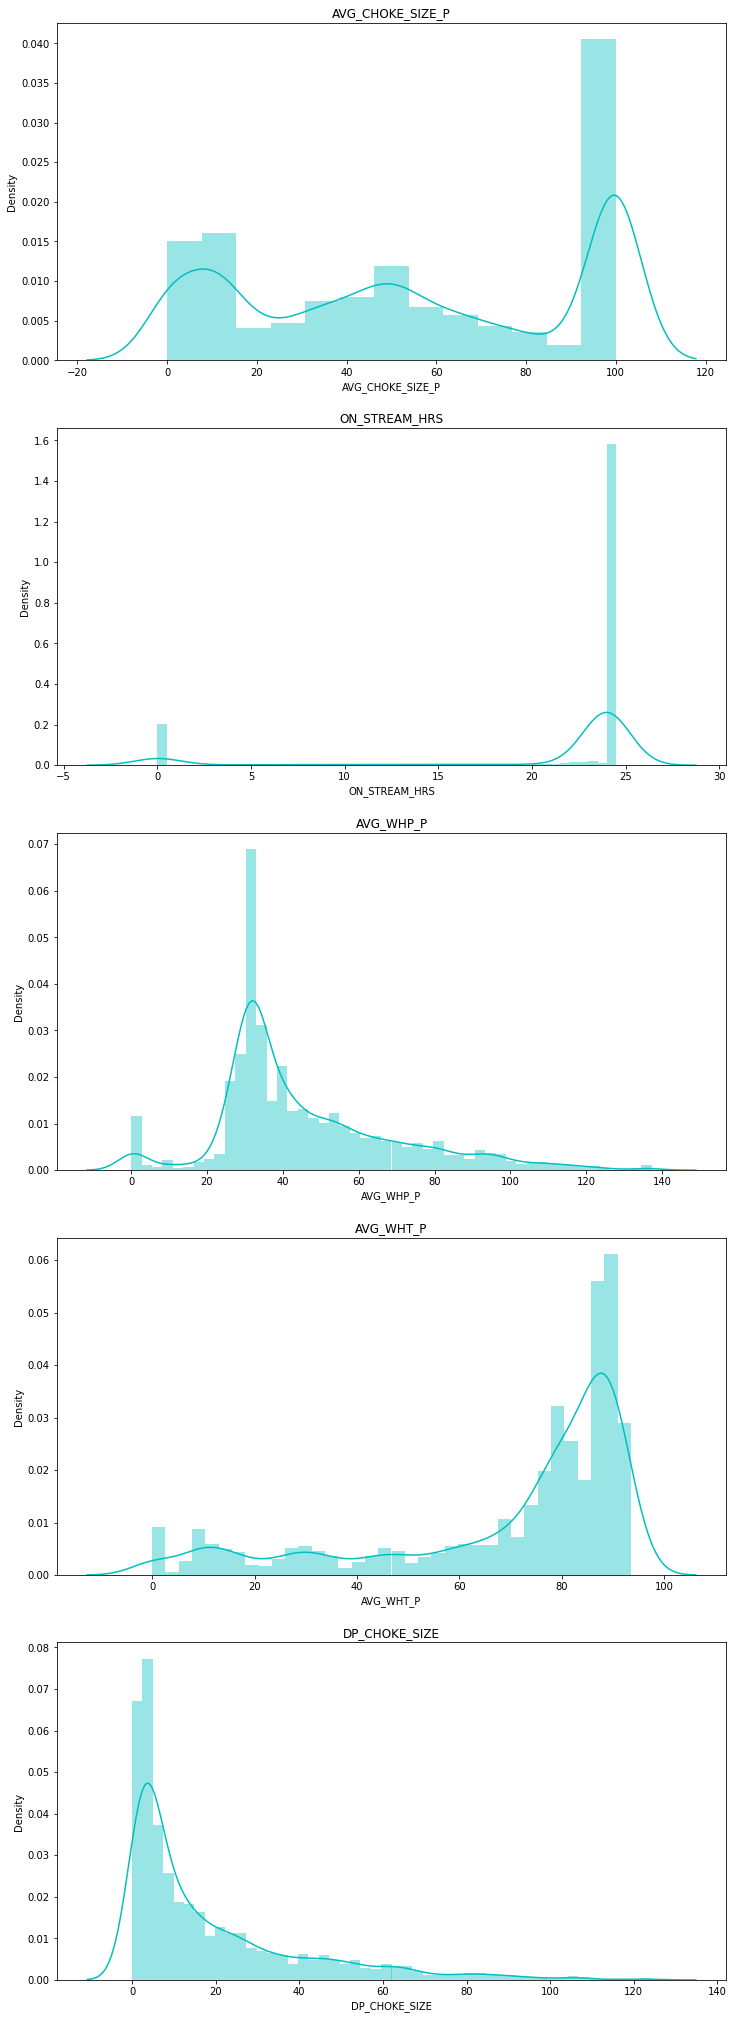

In [ ]:
f, ax = plt.subplots(5, figsize=(12,36))
sns.distplot(df2.AVG_CHOKE_SIZE_P,color='c',ax=ax[0])
sns.distplot(df2.ON_STREAM_HRS,color='c',ax=ax[1])
sns.distplot(df2.AVG_WHP_P,color='c',ax=ax[2])
sns.distplot(df2.AVG_WHT_P,color='c',ax=ax[3])
sns.distplot(df2.DP_CHOKE_SIZE,color='c',ax=ax[4])
ax[0].set_title('AVG_CHOKE_SIZE_P')
ax[1].set_title('ON_STREAM_HRS')
ax[2].set_title('AVG_WHP_P')
ax[3].set_title('AVG_WHT_P')
ax[4].set_title('DP_CHOKE_SIZE')


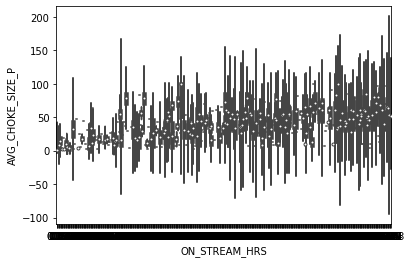

In [ ]:

sns.violinplot(x='ON_STREAM_HRS',y='AVG_CHOKE_SIZE_P',data=df2)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


,Coefficient
ON_STREAM_HRS,6.291114
AVG_DOWNHOLE_PRESSURE,33.521207
AVG_DOWNHOLE_TEMPERATURE,-30.770410
AVG_DP_TUBING,-5.176582
AVG_ANNULUS_PRESS,-0.676258
AVG_WHP_P,0.962709
AVG_WHT_P,12.903193
DP_CHOKE_SIZE,-11.085876
BORE_OIL_VOL,34.046045
BORE_GAS_VOL,-34.002027


In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print("Liner Regression")
print('---------------------------------')
print('Test set evaluation:\n__________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n__________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Liner Regression
---------------------------------
Test set evaluation:
__________________________________
MAE: 15.446430598319138
MSE: 345.2862357663804
RMSE: 18.5818792312936
R2 Square 0.74187552670964
__________________________________
Train set evaluation:
__________________________________
MAE: 15.302009873418218
MSE: 342.5641290362224
RMSE: 18.508488026746605
R2 Square 0.7462258922692802
__________________________________


In [ ]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("Random Sample Consensus")
print('----------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Random Sample Consensus
----------------------------
Test set evaluation:
_____________________________________
MAE: 16.088643258595955
MSE: 456.18264076403597
RMSE: 21.358432544642316
R2 Square 0.6589730731372307
__________________________________
Train set evaluation:
_____________________________________
MAE: 15.882942250855487
MSE: 448.42504796758146
RMSE: 21.17604892248744
R2 Square 0.667803319768938
__________________________________


In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("Ridge Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Ridge Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 16.035066852453998
MSE: 361.32176683758854
RMSE: 19.008465662372345
R2 Square 0.7298878985248682
__________________________________
Train set evaluation:
_____________________________________
MAE: 15.729647755346981
MSE: 353.02093648257954
RMSE: 18.788851388059346
R2 Square 0.7384794099190204
__________________________________


In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("LASSO Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

LASSO Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 16.46801717608532
MSE: 428.03887666563674
RMSE: 20.689100431522796
R2 Square 0.6800124124789317
__________________________________
Train set evaluation:
_____________________________________
MAE: 16.29533805167763
MSE: 422.82369268804547
RMSE: 20.562677177061488
R2 Square 0.6867689981399925
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+06, tolerance: 1.063e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.855e+05, tolerance: 1.043e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("Elastic Net Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Elastic Net Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 16.034634661631458
MSE: 361.63907654274806
RMSE: 19.016810367218476
R2 Square 0.7296506883727392
__________________________________
Train set evaluation:
_____________________________________
MAE: 15.731404463242344
MSE: 353.37926249249017
RMSE: 18.798384571353203
R2 Square 0.7382139592902648
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+06, tolerance: 1.063e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+06, tolerance: 1.043e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)
print(" Polynomial Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

 Polynomial Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 8.038697439034804
MSE: 135.54108102088657
RMSE: 11.642211174037627
R2 Square 0.8986740086234016
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.756716614724254
MSE: 124.14835397611067
RMSE: 11.142188024625625
R2 Square 0.9080299567699522
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)
print("Stochastic Gradient Descent")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Stochastic Gradient Descent
---------------------------------
Test set evaluation:
_____________________________________
MAE: 16.006554753862577
MSE: 362.88452499513147
RMSE: 19.04952820925315
R2 Square 0.7287196326500336
__________________________________
Train set evaluation:
_____________________________________
MAE: 15.691639804147913
MSE: 354.3524388403772
RMSE: 18.824251348735682
R2 Square 0.7374930228628446
__________________________________


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print("Random Forest Regressor")
print('---------------------------------')

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Random Forest Regressor
---------------------------------
Test set evaluation:
_____________________________________
MAE: 1.5420601454600535
MSE: 17.836409757726226
RMSE: 4.223317387756481
R2 Square 0.986666094975129
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5821701287812633
MSE: 2.5177801761672054
RMSE: 1.5867514538097027
R2 Square 0.9981348093290837
__________________________________


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=500, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)
print("Support Vector Machine Regressor")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

RSupport Vector Machine Regressor
---------------------------------
Test set evaluation:
_____________________________________
MAE: 3.4756589081211646
MSE: 42.52401992403301
RMSE: 6.521044389055561
R2 Square 0.9682104610375883
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.9725485492177413
MSE: 31.668670152824664
RMSE: 5.627492350312408
R2 Square 0.976539608704326
__________________________________


In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D,LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras.layers import DepthwiseConv2D,Add, ReLU, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Activation,ActivityRegularization, AvgPool2D
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.metrics import CategoricalAccuracy, BinaryAccuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.21))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=keras.optimizers.Adam(0.00001), loss='mse',metrics='mae')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)


Epoch 1/100
6243/6243 [==============================] - 21s 3ms/step - loss: 3977.5410 - mae: 51.6670 - val_loss: 3107.7280 - val_mae: 44.3313
Epoch 2/100
6243/6243 [==============================] - 19s 3ms/step - loss: 1976.0118 - mae: 35.6149 - val_loss: 1162.6720 - val_mae: 29.0230
Epoch 3/100
6243/6243 [==============================] - 28s 4ms/step - loss: 933.3112 - mae: 25.8650 - val_loss: 698.1161 - val_mae: 22.4954
Epoch 4/100
6243/6243 [==============================] - 21s 3ms/step - loss: 631.2853 - mae: 20.8742 - val_loss: 480.8841 - val_mae: 18.3675
Epoch 5/100
6243/6243 [==============================] - 17s 3ms/step - loss: 463.8430 - mae: 17.5805 - val_loss: 360.3635 - val_mae: 15.6830
Epoch 6/100
6243/6243 [==============================] - 22s 3ms/step - loss: 385.0462 - mae: 15.9559 - val_loss: 294.2697 - val_mae: 14.0454
Epoch 7/100
6243/6243 [==============================] - 25s 4ms/step - loss: 333.9141 - mae: 14.6808 - val_loss: 255.2576 - val_mae: 12.7506
Ep

In [ ]:
pd.DataFrame(r.history).line(y=['loss', 'val_loss'])

NameError: ignored

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("ANN1")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

ANN1
---------------------------------
Test set evaluation:
_____________________________________
MAE: 7.746729830271243
MSE: 113.99917992555196
RMSE: 10.677039848457621
R2 Square 0.9147780153804752
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.311039388440462
MSE: 102.47578422391096
RMSE: 10.123032363077328
R2 Square 0.9240851609927934
__________________________________


In [ ]:
pd.DataFrame.from_dict(results_df).to_csv('results.csv',index=False)